In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import numpy as np

In [2]:

df = pd.read_csv("Melbourne_housing_FULL.csv")

In [8]:
df_rows = len(df)
df_rows

34857

In [4]:

df_nonull = pd.read_csv("Melbourne_housing_FULL.csv")

In [5]:
df_nonull = df_nonull.dropna(subset=["Price"])
df_nonull["Price"] = df_nonull["Price"].astype(int)

In [10]:
df_rows_nonull = len(df_nonull)
df_rows_nonull

27247

In [12]:
data_loss = df_rows - df_rows_nonull
percentage_loss = data_loss / df_rows * 100
print("\nData loss (number of rows removed):", data_loss)
print("Percentage of data loss: {:.2f}%".format(percentage_loss))


Data loss (number of rows removed): 7610
Percentage of data loss: 21.83%


In [20]:
most_common_house = df_nonull['Type'].mode()[0]
most_common_house

'h'

In [28]:
# Frequency table for 'MSZoning'
frequency_table = df_nonull['Type'].value_counts()
frequency_table

Type
h    18472
u     5909
t     2866
Name: count, dtype: int64

In [25]:
proportion_table = df_nonull['Type'].value_counts(normalize=True)
proportion_table

Type
h    0.677946
u    0.216868
t    0.105186
Name: proportion, dtype: float64

C:\Users\anano\AppData\Local\Temp\ipykernel_4360\2316246791.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set3")


<Axes: xlabel='Type'>

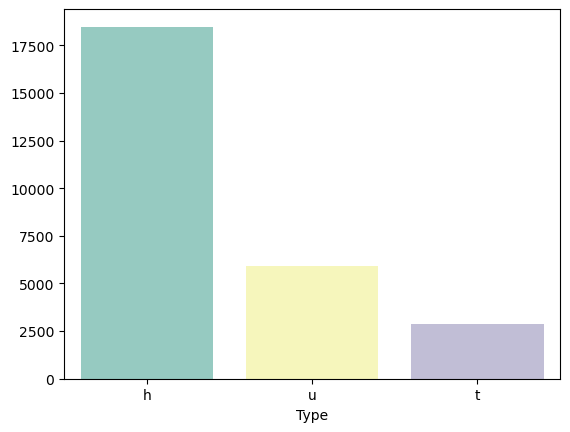

In [30]:
# Plotting a bar chart using the values from the frequency table, with colors sourced from the "Set3" palette
sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set3")

Rooms
1      390000.0
2      678000.0
3      900000.0
4     1205250.0
5     1550000.0
6     1660000.0
7     1350000.0
8     1535883.0
9     1380000.0
10    2115000.0
12    2705000.0
16    5000000.0
Name: Price, dtype: float64


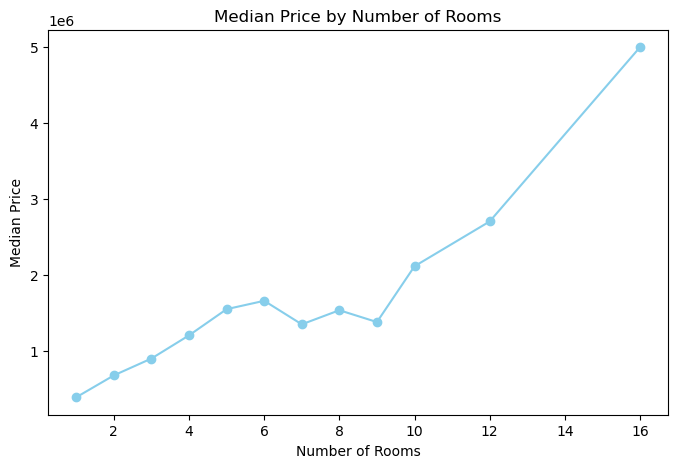

In [32]:
# Calculate the median price by number of rooms
median_price_by_rooms = df.groupby('Rooms')['Price'].median()

# Display the median values
print(median_price_by_rooms)

# Plot the relationship (scatter plot or line)
plt.figure(figsize=(8,5))
plt.plot(median_price_by_rooms.index, median_price_by_rooms.values, marker='o', linestyle='-', color='skyblue')

# Add labels and title
plt.title('Median Price by Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Median Price')

# Show plot
plt.show()

In [33]:
# Calculating the Spearman rank correlation between 'Price' and 'Number of rooms' 
correlation = df_nonull['Price'].corr(df_nonull['Rooms'], method='spearman')
correlation

0.5042971590926004

<Axes: xlabel='Distance', ylabel='Price'>

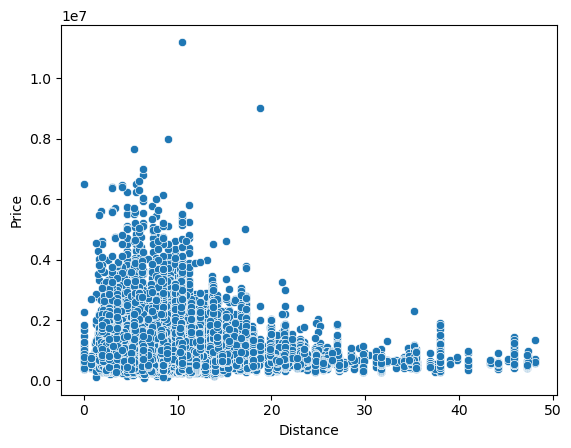

In [34]:
# Plotting a scatter plot to visualize the relationship between 'Distance' and 'Price'
sns.scatterplot(data=df, x='Distance', y='Price')

In [40]:
# Calculating the Spearman rank correlation between 'Price' and 'Distance'
correlation_1 = df_nonull['Price'].corr(df_nonull['Distance'], method='spearman')
correlation

-0.18809341092744206

In [39]:
# Calculating the Spearman rank correlation between 'Landsize' and 'Price'
correlation_2 = df_nonull['Price'].corr(df_nonull['Landsize'], method='spearman')
correlation_2

0.27661206258697724

In [41]:
correlation_3 = df_nonull['Price'].corr(df_nonull['Landsize'])
correlation_3

0.03274836524947045

In [42]:
# Calculate the percentiles
Q1 = df['Landsize'].quantile(0.25)  # 25th percentile
Q7 = df['Landsize'].quantile(0.70)  # 70th percentile

# Filter properties in the first quartile
lower_quartile = df[df['Landsize'] <= Q1]

# Filter properties in the seventh quartile (70th percentile)
upper_quartile = df[df['Landsize'] >= Q7]

# Calculate the median price in both categories
median_price_lower = lower_quartile['Price'].median()
median_price_upper = upper_quartile['Price'].median()

# Display results
print("Median Price in Lower Quartile (Q1):", median_price_lower)
print("Median Price in Seventh Quartile (Q7):", median_price_upper)


Median Price in Lower Quartile (Q1): 720000.0
Median Price in Seventh Quartile (Q7): 1100000.0


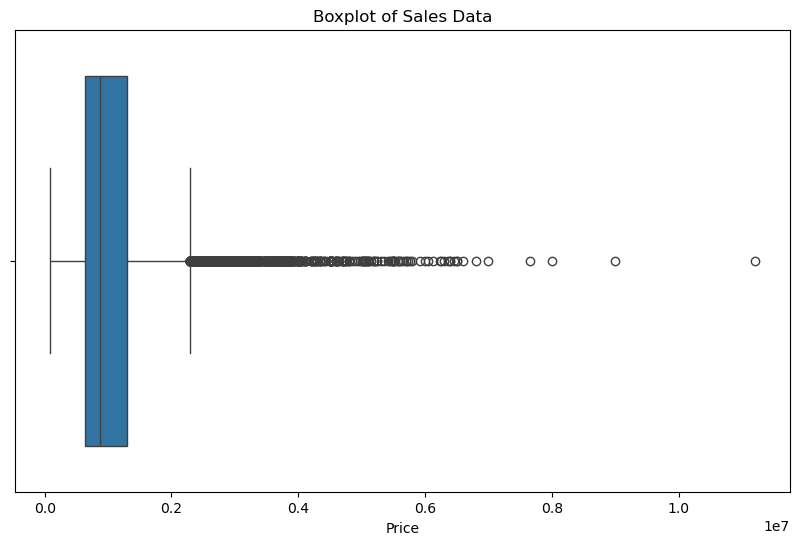

In [44]:
# Create a boxplot to visualize the data and detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_nonull['Price'])
plt.title('Boxplot of Sales Data')
plt.xlabel('Price')
plt.show()

In [45]:
# Define a function for Tukey's Test for Outliers
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)  # First quartile
    Q3 = data.quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [ ]:
# Apply Tukey's method to identify outliers
outliers = tukeys_test_outliers(df_nonull['Price'])

# Create a new DataFrame with outliers
outliers_df = df_nonull[df_nonull['Price'].isin(outliers)]

# Display the outliers
print("Identified Outliers:")
print(outliers_df)


In [49]:
# Calculate the percentage of properties that are outliers
total_properties = df_nonull.shape[0]  # Total number of properties
number_of_outliers = outliers_df.shape[0]  # Number of outliers
percentage_outliers = (number_of_outliers / total_properties) * 100  # Calculate percentage

# Display the percentage
print(f"Percentage of Properties Detected as Outliers: {percentage_outliers:.2f}%")

Percentage of Properties Detected as Outliers: 4.69%


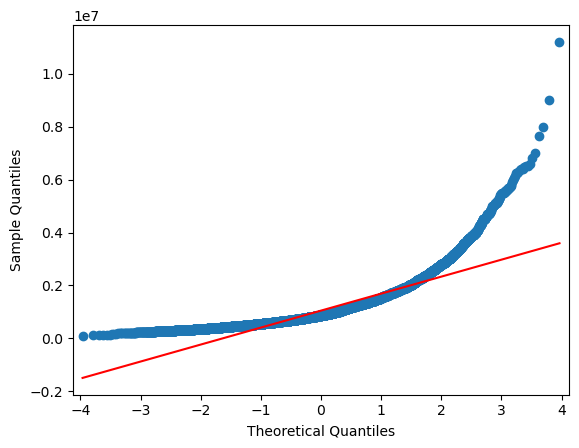

In [52]:
# Generating a Q-Q plot for 'Price' to check if its distribution follows a normal distribution
sm.qqplot(df_nonull['Price'], line='s');

In [53]:
# Calculate skewness and kurtosis

skewness_price = df_nonull['Price'].skew()
kurtosis_price = df_nonull['Price'].kurtosis()

skewness_price, kurtosis_price

(2.5889693410528594, 13.097200515556374)

K-S Statistic: 0.13751284953784154
p-value: 0.0
Reject the null hypothesis: the data does not follow a normal distribution.


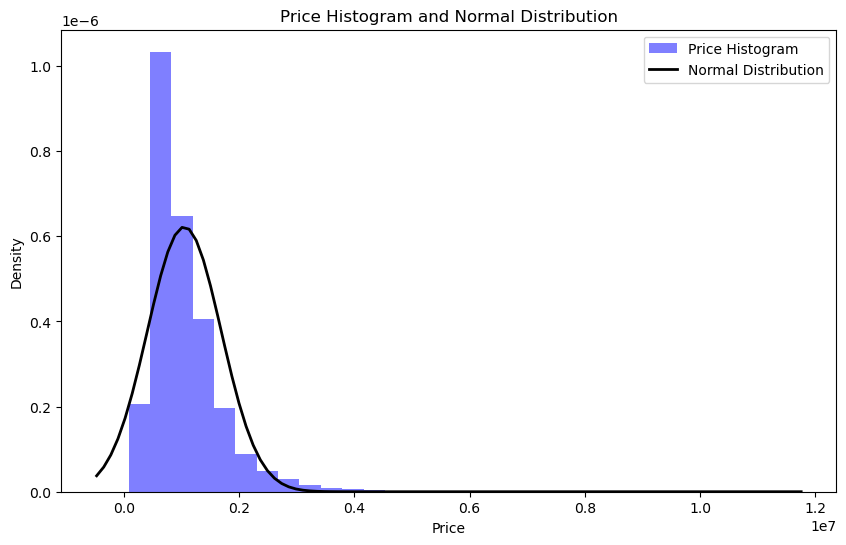

In [59]:
# Perform the Kolmogorov-Smirnov test
statistic, p_value = stats.kstest(df_nonull['Price'], 'norm', args=(df_nonull['Price'].mean(), df_nonull['Price'].std()))

# Results
print("K-S Statistic:", statistic)
print("p-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: the data does not follow a normal distribution.")
else:
    print("Fail to reject the null hypothesis: the data may follow a normal distribution.")

# Visualize the empirical distribution of 'Price' and the normal distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], density=True, bins=30, alpha=0.5, color='b', label='Price Histogram')

# Create points for the normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, df['Price'].mean(), df['Price'].std())  # Mean and standard deviation of 'Price'

# Plot the normal distribution
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')
plt.title('Price Histogram and Normal Distribution')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()



In [60]:
# Step 1: Categorize 'Price' into bins
# You can define your own bins
# For example, we can create 4 categories based on price ranges

price_bins = [0, 300000, 600000, 900000, np.inf]
price_labels = ['Low', 'Medium', 'High', 'Very High']
df_nonull['PriceCategory'] = pd.cut(df_nonull['Price'], bins=price_bins, labels=price_labels, right=False)

# Step 2: Create a contingency table
contingency_table = pd.crosstab(df_nonull['Regionname'], df_nonull['PriceCategory'])

# Step 3: Perform the Chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Results of the Chi-square test
print("Chi-square Statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of Freedom:", dof)

# Step 4: Calculate Cramér's V
n = contingency_table.sum().sum()  # Total number of observations
phi2 = chi2_stat / n  # Cramér's V formula component
r, k = contingency_table.shape  # Number of rows and columns
cramers_v = np.sqrt(phi2 / min(k - 1, r - 1))

print("Cramér's V:", cramers_v)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: there is a significant association between RegionName and Price categories.")
else:
    print("Fail to reject the null hypothesis: there is no significant association between RegionName and Price categories.")


KeyError: 'RegionName'